In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train_path = 'data.aug/tc-ts/train'
valid_path = 'data.aug/tc-ts/valid'
test_path = 'data.aug/tc-ts/test'

In [4]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.xception.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['TS', 'TC'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.xception.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['TS', 'TC'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.xception.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['TS', 'TC'], batch_size=10, shuffle=False)
    

Found 2093 images belonging to 2 classes.
Found 90 images belonging to 2 classes.
Found 95 images belonging to 2 classes.


In [5]:
xception = tf.keras.applications.xception.Xception()
#xception.summary()

91889664/91884032 [==============================] - 0s 0us/step


In [6]:
x = xception.layers[-2].output

In [7]:
output = Dense(units=2, activation='softmax')(x)

In [8]:
model = Model(inputs=xception.input, outputs=output)

In [9]:
#for layer in model.layers[:-23]:
   # layer.trainable = False
for layer in model.layers[132:]:
    layer.trainable = True
for layer in model.layers[:132]:
    layer.trainable = False
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.trainable)

0 input_1 False
1 block1_conv1 False
2 block1_conv1_bn False
3 block1_conv1_act False
4 block1_conv2 False
5 block1_conv2_bn False
6 block1_conv2_act False
7 block2_sepconv1 False
8 block2_sepconv1_bn False
9 block2_sepconv2_act False
10 block2_sepconv2 False
11 block2_sepconv2_bn False
12 conv2d False
13 block2_pool False
14 batch_normalization False
15 add False
16 block3_sepconv1_act False
17 block3_sepconv1 False
18 block3_sepconv1_bn False
19 block3_sepconv2_act False
20 block3_sepconv2 False
21 block3_sepconv2_bn False
22 conv2d_1 False
23 block3_pool False
24 batch_normalization_1 False
25 add_1 False
26 block4_sepconv1_act False
27 block4_sepconv1 False
28 block4_sepconv1_bn False
29 block4_sepconv2_act False
30 block4_sepconv2 False
31 block4_sepconv2_bn False
32 conv2d_2 False
33 block4_pool False
34 batch_normalization_2 False
35 add_2 False
36 block5_sepconv1_act False
37 block5_sepconv1 False
38 block5_sepconv1_bn False
39 block5_sepconv2_act False
40 block5_sepconv2 False

In [11]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
#model.summary()

In [12]:
model.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=valid_batches,
            validation_steps=len(valid_batches),
            epochs=30,
            verbose=2
)

Epoch 1/30
210/210 - 461s - loss: 0.6330 - accuracy: 0.6302 - val_loss: 0.6352 - val_accuracy: 0.6444
Epoch 2/30
210/210 - 14s - loss: 0.5456 - accuracy: 0.7172 - val_loss: 0.6302 - val_accuracy: 0.6667
Epoch 3/30
210/210 - 14s - loss: 0.5216 - accuracy: 0.7305 - val_loss: 0.5989 - val_accuracy: 0.6778
Epoch 4/30
210/210 - 14s - loss: 0.5078 - accuracy: 0.7430 - val_loss: 0.6162 - val_accuracy: 0.6667
Epoch 5/30
210/210 - 14s - loss: 0.4931 - accuracy: 0.7473 - val_loss: 0.5819 - val_accuracy: 0.7000
Epoch 6/30
210/210 - 14s - loss: 0.4830 - accuracy: 0.7582 - val_loss: 0.5813 - val_accuracy: 0.7222
Epoch 7/30
210/210 - 14s - loss: 0.4752 - accuracy: 0.7721 - val_loss: 0.5845 - val_accuracy: 0.6889
Epoch 8/30
210/210 - 14s - loss: 0.4668 - accuracy: 0.7735 - val_loss: 0.5971 - val_accuracy: 0.6667
Epoch 9/30
210/210 - 14s - loss: 0.4595 - accuracy: 0.7778 - val_loss: 0.5902 - val_accuracy: 0.6667
Epoch 10/30
210/210 - 15s - loss: 0.4524 - accuracy: 0.7769 - val_loss: 0.5830 - val_accur

In [13]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [14]:
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.

In [15]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [17]:
test_batches.class_indices

{'TC': 1, 'TS': 0}

Confusion matrix, without normalization
[[27  8]
 [15 45]]


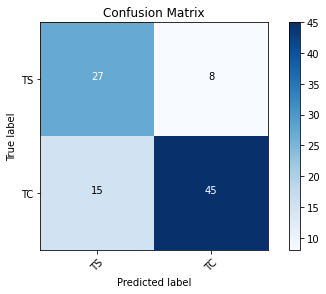

In [18]:
cm_plot_labels = ['TS','TC']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')